In [162]:
### ESTR 2018: Lecture 1 code
### runs in python3 (jupyter notebook)

from pylab import *             # library for making plots
rcParams['figure.figsize'] = [12, 8]

In [63]:
# calculate (n choose k)
# assumes k is between 0 and n
def binom(n, k):
    if n == 0:
        return 1
    logtop = sum([log(i) for i in range(n - k + 1, n + 1)])
    logbot = sum([log(i) for i in range(2, k + 1)])
    return exp(logtop - logbot)

# return probability for an n-step random walk 
# assumes n is even
def returnprob(n):
    return binom(n, n // 2) / pow(2.0, n)

In [64]:
returnprob(100)

0.07958923738717676

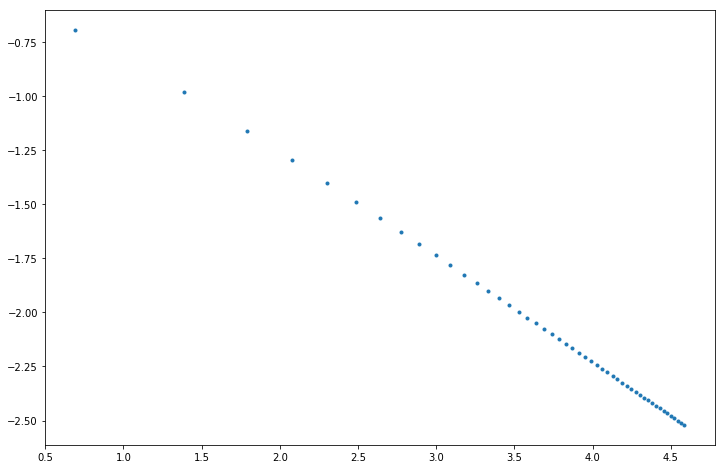

In [168]:
N = range(2, 100, 2)
B = [returnprob(n) for n in N]
plot(log(N), log(B), '.')

In [113]:
# calculate the number of length-k loops that never go negative
# for k ranging from 0 to n - 1
def posloops(n):
    numloops = [1.0]
    for k in range(1, n):
        numloops.append(sum([numloops[i] * numloops[k - 2 - i] for i in range(k - 1)]))
    return numloops

# calculate the probability of returning to the origin for the first
# time after exactly n steps
def firstreturnprob(n):
    return 2 * posloops(n - 1)[-1] / pow(2.0, n)

In [131]:
firstreturnprob(100)

0.0008039316907795835

In [157]:
# calculate the probability of returning to the origin within k steps
# for all k ranging from 0 to n - 1
def withinprob(n):
    numloops = posloops(n)
    firstreturnprobs = [2 * numloops[k - 2] / pow(2.0, k) for k in range(1, n)]
    cumprobs = [0.0]
    for p in firstreturnprobs:
        cumprobs.append(cumprobs[-1] + p)
    return cumprobs

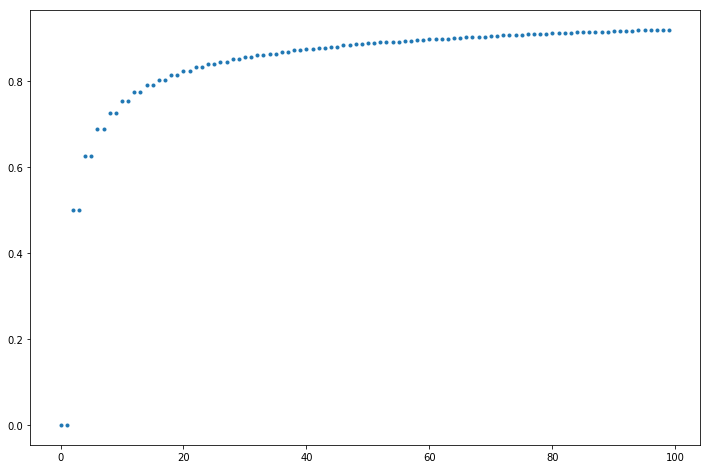

In [166]:
plot(range(100), withinprob(100), '.')